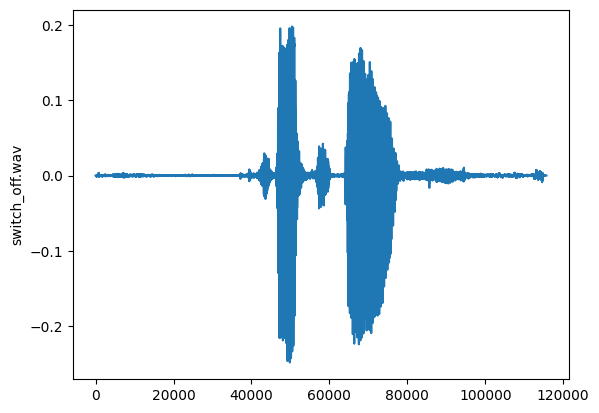

In [1]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'switch_off.wav'
data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()



In [2]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
desired_sample_rate = 11000.0
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[-9.3424444e-07  1.0694389e-06 -1.2842142e-06 ...  1.2343983e-07
 -1.2014206e-07  1.1534302e-07]
length 26517
max value 0.197163
min value -0.23996502
value range 0.437128


In [3]:
m68code = "/*    File "+soundfile+ "\r\n *    Sample rate "+str(int(desired_sample_rate)) +" Hz\r\n */\r\n"
m68code += "#define WAV_DATA_LENGTH "+str(len(data_out))+" \r\n\r\n"
m68code += "uint8_t WAV_DATA[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
file_name = 'switch_off'
dat_file = open(file_name + '.dat', 'wb')
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    v =  int((isin * 255))
    #print(v.to_bytes())
    dat_file.write(v.to_bytes())
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
dat_file.close()      
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)
f=open(file_name + '.h', 'w')
f.write(m68code)
f.close()

/*    File switch_off.wav
 *    Sample rate 11000 Hz
 */
#define WAV_DATA_LENGTH 26517 

uint8_t WAV_DATA[] = {
    139,139,139,139,139,139,140,140,140,140,140,140,140,140,140,140,
    140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,
    140,140,140,140,139,139,139,139,139,139,139,139,139,139,139,139,
    139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,
    139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,
    139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,
    139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,
    139,139,139,139,139,139,139,140,140,140,140,140,140,140,140,140,
    140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,
    140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,
    140,140,140,140,140,140,140,140,141,141,141,141,141,142,141,141,
    141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,140,
    140,140,140,140,140,140,140,139,139,139,139,139,139,139,